# Постановка задачи
1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.
2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import make_regression

In [3]:
# Возьмем 2 признака и 5000 объектов
n_features = 2
n_objects = 5000

In [4]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=n_objects, n_features = n_features, noise = 5, 
                                              coef = True, random_state = 5)

In [5]:
coef

array([33.97219797, 37.21199725])

In [6]:
data

array([[ 0.14418421, -0.25863069],
       [-1.41697955, -0.36783811],
       [-0.01735327, -0.12765822],
       ...,
       [-1.08362984,  1.09435596],
       [-1.30110969, -0.52717844],
       [-1.22737663, -0.66322721]])

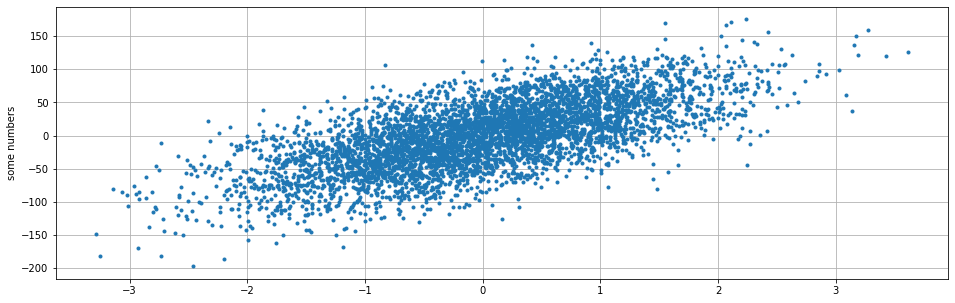

In [7]:
plt.figure(figsize = (16,5))
plt.plot(data[:,0], target,'.')
plt.grid(True)
plt.ylabel('some numbers')
plt.show()

## Градиентный спуск

In [8]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [9]:
# возьмем нулевые начальные веса
w = np.zeros(n_features)

In [10]:
# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 25.14


In [11]:
errors_grad = errors

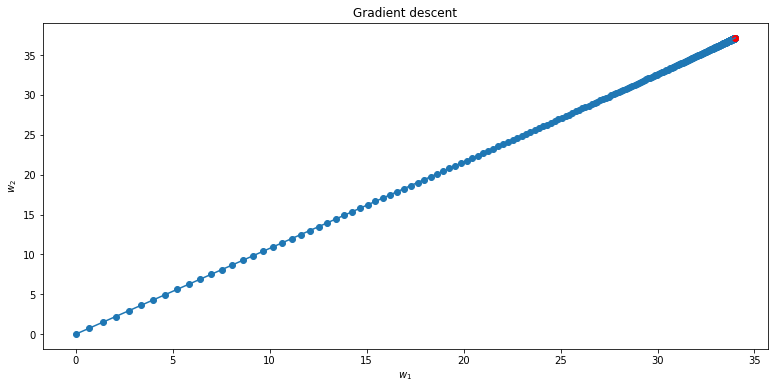

In [12]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

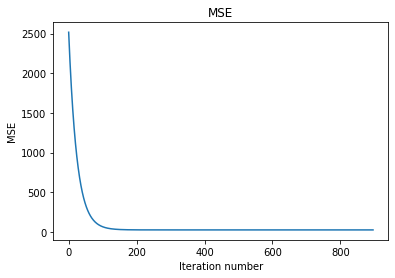

In [13]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

## Стохастический градиентный спуск

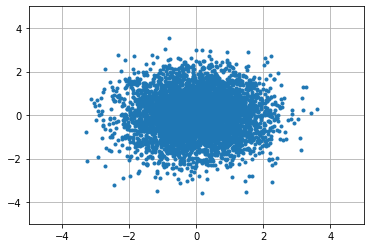

In [14]:
plt.plot(data[:,0],data[:,1], '.')
plt.xlim((-5,5))
plt.ylim((-5,5))
plt.grid(True)
plt.show()

Учитывая тот факт, что данные уже нормализованы, то масштабирование признаков методом стандартизации мы делать не будем.

In [15]:
# Получим средние значения и стандартное отклонение по столбцам
 
# means = np.mean(data, axis=0)
# stds = np.std(data, axis=0)

# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)
 
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
# for i in range(data.shape[0]):
#    for j in range(data.shape[1]):
#        data[i][j] = (data[i][j] - means[j])/stds[j]

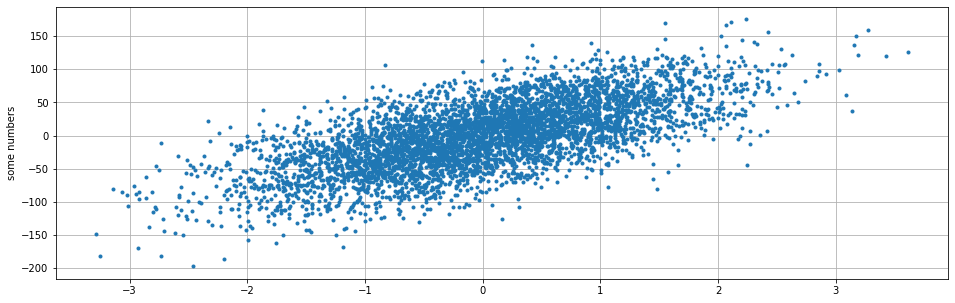

In [16]:
plt.figure(figsize = (16,5))
plt.plot(data[:,0], target,'.')
plt.grid(True)
plt.ylabel('some numbers')
plt.show()

In [29]:
# инициализируем начальный вектор весов
# w = np.random.randn(2) # Это частный случай
w = np.zeros(2)
 
# список векторов весов после каждой итерации
w_list = [w.copy()]
 
# список значений ошибок после каждой итерации
errors = []
 
# шаг градиентного спуска
eta = 0.5
 
# максимальное число итераций
max_iter = 1e8
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
lamb = 0.01 
np.random.seed(1234)
Q = [np.dot(data[0], w) - target[0]] 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(data[train_ind], w) - target[train_ind]))
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 25.1601


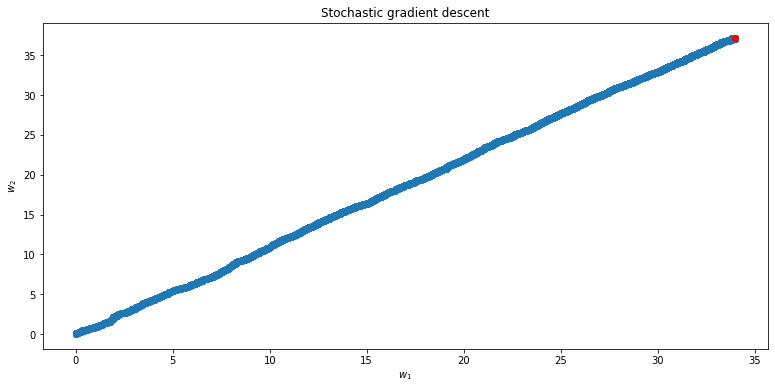

In [30]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
# plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

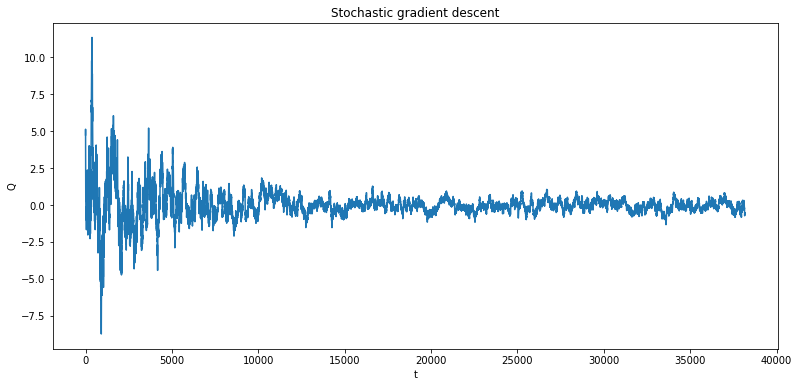

In [31]:
# Визуализируем изменение весов
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel('t')
plt.ylabel('Q')
plt.plot(Q)
plt.show()

Text(0, 0.5, 'MSE')

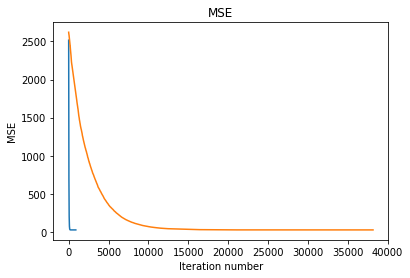

In [32]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_grad)), errors_grad)
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

**Выводы**\
Исходя из полученных графиков скорости изменения ошибки можно сказать, что градиентный спуск намного быстрее обучается, однако на больших массивах данных он не применим.

## Добавим L2 регуляризацию

In [33]:
# инициализируем начальный вектор весов
# w = np.random.randn(2) # Это частный случай
w = np.zeros(2)
 
# список векторов весов после каждой итерации
w_list = [w.copy()]
 
# список значений ошибок после каждой итерации
errors = []
 
# шаг градиентного спуска
eta = 0.5
 
# максимальное число итераций
max_iter = 1e8
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
lamb = 0.01 

# Коэфициент L2 регуляризации
L2_lamb = 1e-4

np.random.seed(1234)
Q = [np.dot(data[0], w) - target[0]] 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind]) + L2_lamb*np.sum(np.square(w))) / target.shape[0]
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(data[train_ind], w) - target[train_ind]) + L2_lamb*np.sum(np.square(w)))
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 25.1463


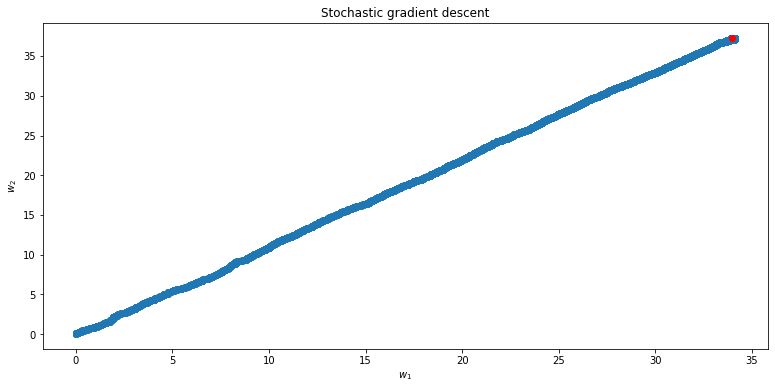

In [34]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
# plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

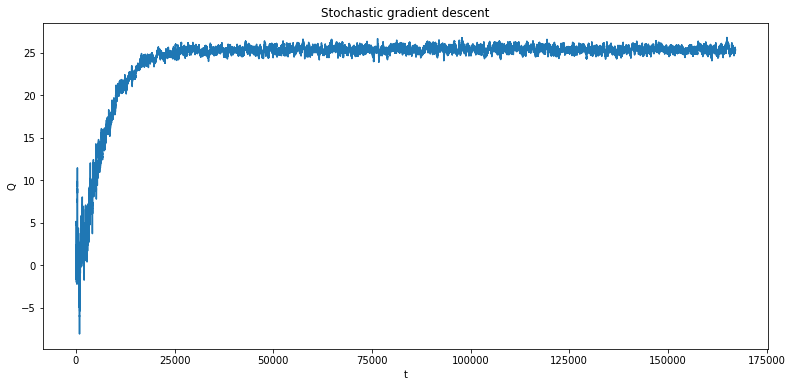

In [35]:
# Визуализируем изменение весов
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel('t')
plt.ylabel('Q')
plt.plot(Q)
plt.show()

Text(0, 0.5, 'MSE')

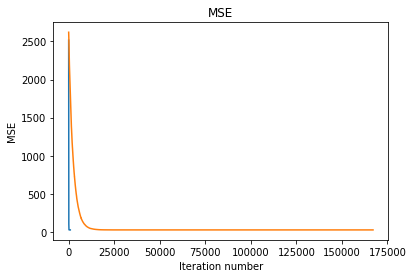

In [36]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_grad)), errors_grad)
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')